<a href="https://colab.research.google.com/github/deanhadzi/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 14,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }
    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+
            
            
start()

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [10]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [11]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [12]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [13]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [14]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.5000,-69.9667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of A...,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0000,66.0000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.5000,18.5000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.2167,-63.0500,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [15]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_perce...,NaN,measure,The estimated percent...,NaN,NaN,NaN,NaN,"Adults with HIV (%, a...","Adults with HIV (%, a...",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder...,hiv
1,age_at_1st_marriage_w...,NaN,measure,"The mean age, in year...",NaN,NaN,NaN,NaN,Age at 1st marriage (...,Age at 1st marriage (...,Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder...,population
2,aged_15_24_employment...,NaN,measure,Percentage of total p...,NaN,NaN,NaN,NaN,Aged 15-24 employment...,Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,employment_rate
3,aged_15_24_unemployme...,NaN,measure,Percentage of total p...,NaN,NaN,NaN,NaN,Aged 15-24 unemployme...,Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,unemployment
4,aged_15_64_labour_for...,NaN,measure,"For age group 15-64, ...",NaN,NaN,NaN,NaN,Aged 15-64 labour for...,Aged 15-64,Labour force particip...,"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,labour_force_particip...


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [16]:
merged1 = pd.merge(income, lifespan)
print(merged1.shape)
merged1.head()

(40437, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [17]:
merged2 = pd.merge(merged1, population)
print(merged2.shape)
merged2.head()

(40437, 5)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [18]:
df = pd.merge(merged2, entities[['country', 'name', 'world_6region']],
             how='inner', left_on='geo', right_on='country')
print(df.shape)
df.head()

(40437, 8)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [19]:
df = df.drop(columns=['geo', 'country'])
df = df.rename(columns = {
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years':'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'region6'
    })
print(df.shape)
df.head()

(40437, 6)


,year,income,lifespan,population,country,region6
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


## Explore data

In [20]:
df.describe()

,year,income,lifespan,population
count,40437.0000,40437.0000,40437.0000,4.0437e+04
mean,1909.2929,4619.4927,43.1321,1.3712e+07
std,63.3087,10209.5710,16.3132,6.6063e+07
min,1800.0000,247.0000,1.0000,2.1280e+03
25%,1854.0000,876.0000,31.1600,4.1133e+05
50%,1909.0000,1442.0000,35.5000,1.9860e+06
75%,1964.0000,3488.0000,55.9700,6.4997e+06
max,2018.0000,177522.0000,84.1700,1.4150e+09


In [21]:
df.describe(exclude='number')

,country,region6
count,40437,40437
unique,187,6
top,Papua New Guinea,europe_central_asia
freq,219,10778


In [22]:
df.country.nunique()

187

In [23]:
usa = df[df.country == 'United States']
usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region6
38046,1818,2258,39.41,9879049,United States,america
38146,1918,9371,47.18,106721812,United States,america
38246,2018,54898,79.14,326766748,United States,america


In [24]:
china = df[df.country == 'China']
china[china.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region6
6854,1818,985,32.00,374161494,China,east_asia_pacific
6954,1918,989,22.13,462444535,China,east_asia_pacific
7054,2018,16018,76.92,1415045928,China,east_asia_pacific


## Plot visualization

In [25]:
now = df[df.year == 2018]
now.shape

(184, 6)

In [0]:
qatar = now[now.country == "Qatar"]
qatar_income = qatar.income.values[0]
qatar_lifespan = qatar.lifespan.values[0]

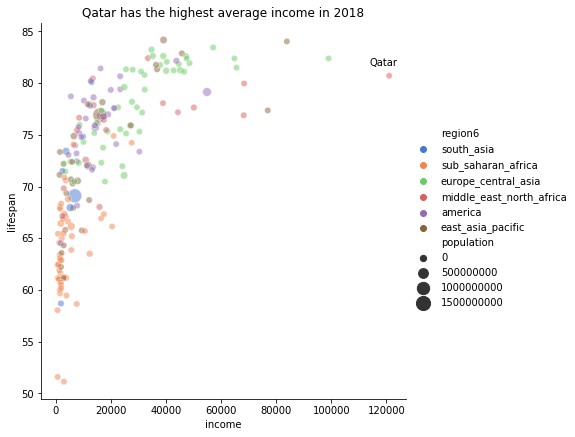

In [27]:
sns.relplot(x='income', y='lifespan', hue='region6', size='population',
           sizes=(40, 200), alpha=.5, palette='muted', height=6, data=now);

plt.title('Qatar has the highest average income in 2018')
plt.text(x=qatar_income-7000, y=qatar_lifespan+1, s="Qatar");

## Analyze outliers

In [28]:
now[now.income > 80000].sort_values(by='income', ascending=False)

,year,income,lifespan,population,country,region6
30362,2018,121033,80.71,2694849,Qatar,middle_east_north_africa
22212,2018,99034,82.39,590321,Luxembourg,europe_central_asia
31895,2018,83888,84.03,5791901,Singapore,east_asia_pacific


## Plot multiple years

In [29]:
years = [1818, 1918, 2018]
centuries = df[df.year.isin(years)]
centuries.shape

(552, 6)

## Point out a story

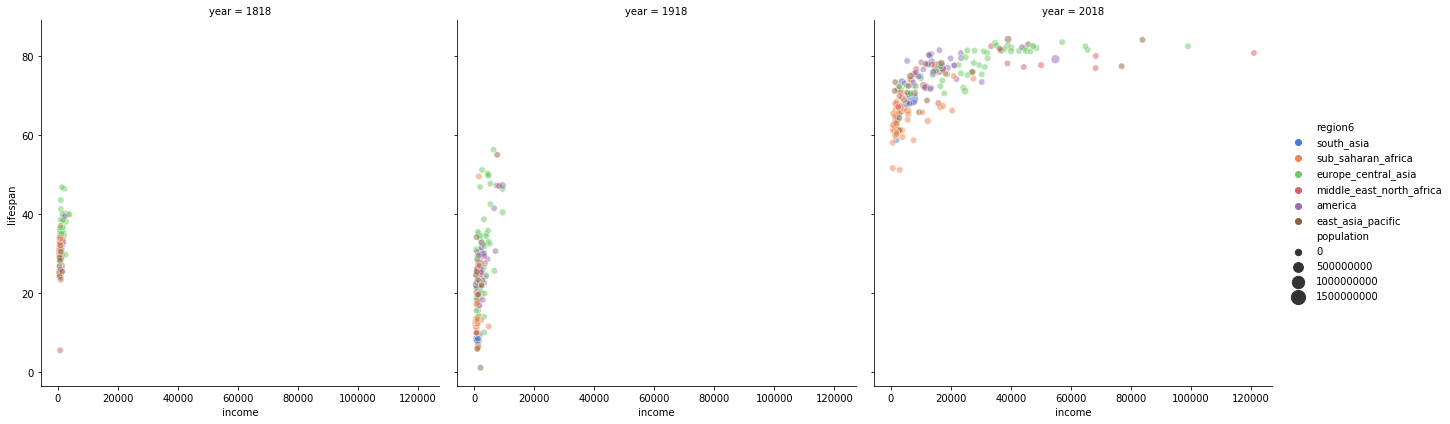

In [30]:
sns.relplot(x='income', y='lifespan', hue='region6', size='population', col='year',
           sizes=(40, 200), alpha=.5, palette='muted', height=6, data=centuries);

# ASSIGNMENT
Replicate the lesson code

Save each subplot as picture and create an animation

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project

In [0]:
# Importing all libraries needed for this homework

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
# Merging income and lifespan

hw_merge1 = pd.merge(income, lifespan)

In [0]:
# Adding population

hw_merge2 = pd.merge(hw_merge1, population)

In [34]:
# Making the final DF with country name and region added

hw_df = pd.merge(hw_merge2, entities[['country', 'name', 'world_6region']],
                 left_on='geo', right_on='country')
print(hw_df.shape)
hw_df.head()

(40437, 8)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [35]:
# Cleaning up the dataframe to have better column names and dropping the
# unecessary columns

hw_df = hw_df.drop(columns = ['geo', 'country'])
hw_df.rename(columns = {'time': 'Year', 
                        'income_per_person_gdppercapita_ppp_inflation_adjusted': 'Income',
                        'life_expectancy_years': 'Lifespan',
                        'population_total': 'Population',
                        'name': 'Country',
                        'world_6region': 'Region'
                        }, inplace=True)
print(hw_df.shape)
hw_df.head()


(40437, 6)


,Year,Income,Lifespan,Population,Country,Region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [36]:
# Reorganizing columns to match the format of the table from the first line of this notebook.

hw_df = hw_df[['Year', 'Country', 'Region', 'Income', 'Lifespan', 'Population']]
hw_df.head()

,Year,Country,Region,Income,Lifespan,Population
0,1800,Afghanistan,south_asia,603,28.21,3280000
1,1801,Afghanistan,south_asia,603,28.20,3280000
2,1802,Afghanistan,south_asia,603,28.19,3280000
3,1803,Afghanistan,south_asia,603,28.18,3280000
4,1804,Afghanistan,south_asia,603,28.17,3280000


In [37]:
# Finally correcting the names of the regions

regions_corrected = {'europe_central_asia': 'Europe & Central Asia',
                     'sub_saharan_africa': 'Sub Saharan Africa',
                     'america': 'America',
                     'east_asia_pacific': 'East Asia & Pacific',
                     'middle_east_north_africa': 'Middle East & North Africa',
                     'south_asia': 'South Asia'}

hw_df.replace(to_replace=regions_corrected, inplace=True)
hw_df.head()

,Year,Country,Region,Income,Lifespan,Population
0,1800,Afghanistan,South Asia,603,28.21,3280000
1,1801,Afghanistan,South Asia,603,28.20,3280000
2,1802,Afghanistan,South Asia,603,28.19,3280000
3,1803,Afghanistan,South Asia,603,28.18,3280000
4,1804,Afghanistan,South Asia,603,28.17,3280000


In [38]:
# Dropping all the year entries for each country except 1818, 1918 and 2018

years = [1818, 1918, 2018]

hw_df_final = hw_df[hw_df.Year.isin(years)]
print(hw_df_final.shape)
hw_df_final.head()

(552, 6)


,Year,Country,Region,Income,Lifespan,Population
18,1818,Afghanistan,South Asia,604,28.03,3308390
118,1918,Afghanistan,South Asia,849,7.89,5704092
218,2018,Afghanistan,South Asia,1867,58.69,36373176
237,1818,Angola,Sub Saharan Africa,668,26.98,1586896
337,1918,Angola,Sub Saharan Africa,1174,12.01,3487015


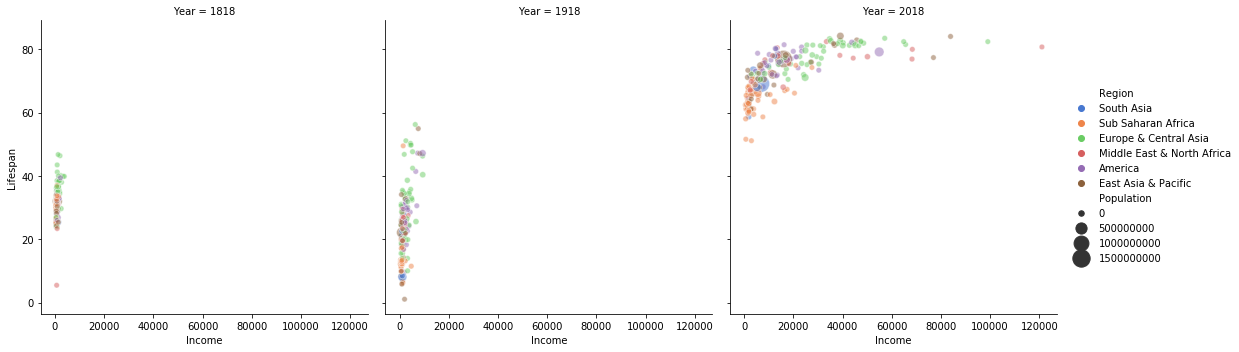

In [67]:
# Visual representation of the dataframe.

sns.relplot(x='Income', y='Lifespan', hue='Region', size='Population', col='Year',
            sizes=(30, 300), palette='muted', alpha=.5, height=5, aspect=1, data=hw_df_final);